### What is this notebook for? ###

The main purpose of this notebook is parsing `param` attribute. 

**Prerequisities:**  csv file with listings attributes `otodom_Jun_Dec.csv`. Can be obtained with sql code in the file `get_otodom_data.sql`, section 1.

**Output:**
"ads_with_featuresOtodom.csv"

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
ads = pd.read_csv('../data/Otodom/otodom_Jun_Dec.csv', header=None)

In [4]:
ads.columns = ["ad_id", "region_id", "category_id", "subregion_id", "district_id", "city_id", "user_id", 
               "last_update_date", "created_at_first", "valid_to", "status", "title", "description",
               "params", "map_address", "private_business", 
"images_counter", "paidads_id_index", "paidads_id_payment", "paidads_valid_to", "was_paid_for_post",
"is_paid_for_post", "export_olx_to", "brand_program_id", "user_quality_score", "updated_at",
"street_name", "street_id", "panorama", "mysql_search_rooms_num", "mysql_search_m",
"mysql_search_price", "mysql_search_price_per_m", "movie", "ad_quality_score", "user_quality_score2",
"map_lon", "map_lat", "net_ad_counted"]

In [5]:
max(ads['params'].apply(lambda x: len(x)))

1041

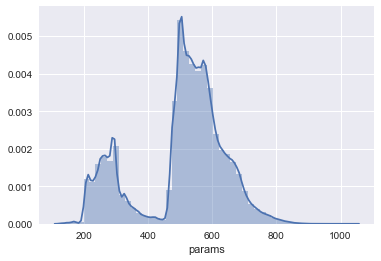

In [6]:
sns.distplot(ads['params'].apply(lambda x: len(x)))

In [7]:
ads['params'].head()

0    price<=>price<br>price<=>530<br>price[currency...
1    price<=>price<br>price<=>1600<br>price[currenc...
2    price<=>price<br>price<=>785000<br>price[curre...
3    price<=>price<br>price<=>9500<br>price[currenc...
4    price<=>price<br>price<=>6200<br>price[currenc...
Name: params, dtype: object

In [8]:
test = ads['params'][3]
test

'price<=>price<br>price<=>9500<br>price[currency]<=>PLN<br>rent<=>price<br>rent<=><br>rent[currency]<=><br>deposit<=>price<br>deposit<=><br>deposit[currency]<=><br>m<=>117<br>rooms_num<=>4<br>building_type<=>apartment<br>floor_no<=>ground_floor<br>building_floors_num<=>2<br>building_material<=>brick<br>windows_type<=><br>heating<=>urban<br>build_year<=>2012<br>construction_status<=>ready_to_use<br>free_from<=><br>rent_to_students<=><br>equipment_types<=><br>security_types<=><br>media_types<=><br>extras_types<=>lift'

In [9]:
test.split('<br>')

['price<=>price',
 'price<=>9500',
 'price[currency]<=>PLN',
 'rent<=>price',
 'rent<=>',
 'rent[currency]<=>',
 'deposit<=>price',
 'deposit<=>',
 'deposit[currency]<=>',
 'm<=>117',
 'rooms_num<=>4',
 'building_type<=>apartment',
 'floor_no<=>ground_floor',
 'building_floors_num<=>2',
 'building_material<=>brick',
 'windows_type<=>',
 'heating<=>urban',
 'build_year<=>2012',
 'construction_status<=>ready_to_use',
 'free_from<=>',
 'rent_to_students<=>',
 'equipment_types<=>',
 'security_types<=>',
 'media_types<=>',
 'extras_types<=>lift']

It looks like we can split on `<br>` to obtain attributes.
Attributes names and attributes values separated by `<=>`. 

In [10]:
for feat in test.split('<br>'):
    k, v = feat.split("<=>")
    print("k:", k, " v:", v)

k: price  v: price
k: price  v: 9500
k: price[currency]  v: PLN
k: rent  v: price
k: rent  v: 
k: rent[currency]  v: 
k: deposit  v: price
k: deposit  v: 
k: deposit[currency]  v: 
k: m  v: 117
k: rooms_num  v: 4
k: building_type  v: apartment
k: floor_no  v: ground_floor
k: building_floors_num  v: 2
k: building_material  v: brick
k: windows_type  v: 
k: heating  v: urban
k: build_year  v: 2012
k: construction_status  v: ready_to_use
k: free_from  v: 
k: rent_to_students  v: 
k: equipment_types  v: 
k: security_types  v: 
k: media_types  v: 
k: extras_types  v: lift


In [11]:
def get_features_df(ad_id, params_string):
    f_keys = []
    f_vals = []
    features_list = params_string.split('<br>')
    for feature in features_list:
        if feature != "price<=>price":
            try:
                k, v = feature.split("<=>")
                f_keys.append(k)
                f_vals.append(v)
                pass
            except ValueError:
                print(feature)
    data = {'f_names': f_keys, 'f_values': f_vals}
    df_t = pd.DataFrame(data)
    df_t['ad_id'] = ad_id
    return df_t

Test our function on some records:

In [12]:
get_features_df(ad_id = ads['ad_id'][3], params_string = ads['params'][3])

,f_names,f_values,ad_id
0,price,9500,48452430
1,price[currency],PLN,48452430
2,rent,price,48452430
3,rent,,48452430
4,rent[currency],,48452430
5,deposit,price,48452430
6,deposit,,48452430
7,deposit[currency],,48452430
8,m,117,48452430
9,rooms_num,4,48452430


In [13]:
get_features_df(ad_id = ads['ad_id'][5], params_string = ads['params'][5])

,f_names,f_values,ad_id
0,price,16500,48452682
1,price[currency],PLN,48452682
2,terrain_area,1000,48452682
3,m,360,48452682
4,rooms_num,6,48452682
5,building_type,detached,48452682
6,floors_num,,48452682
7,building_material,,48452682
8,build_year,2010,48452682
9,garret_type,,48452682


In [14]:
get_features_df(ad_id = ads['ad_id'][196], params_string = ads['params'][196])

,f_names,f_values,ad_id
0,price,600,48498140
1,price[currency],PLN,48498140
2,building_type,,48498140
3,rent,price,48498140
4,rent,,48498140
5,rent[currency],,48498140
6,deposit,price,48498140
7,deposit,,48498140
8,deposit[currency],,48498140
9,roomsize,,48498140


In [15]:
get_features_df(ad_id = ads['ad_id'][1300], params_string = ads['params'][1300])

,f_names,f_values,ad_id
0,price,139000,48486934
1,price[currency],PLN,48486934
2,m,37,48486934
3,rooms_num,2,48486934
4,market,secondary,48486934
5,building_type,block,48486934
6,floor_no,floor_2,48486934
7,building_floors_num,,48486934
8,building_material,brick,48486934
9,windows_type,plastic,48486934


In [16]:
get_features_df(ad_id = ads['ad_id'][15000], params_string = ads['params'][15000])

,f_names,f_values,ad_id
0,price,1200,48558250
1,price[currency],PLN,48558250
2,building_type,,48558250
3,rent,price,48558250
4,rent,,48558250
5,rent[currency],,48558250
6,deposit,price,48558250
7,deposit,,48558250
8,deposit[currency],,48558250
9,roomsize,two,48558250


Lets write parsed attributes to csv file:

In [17]:
res = get_features_df(ad_id = ads['ad_id'][0], params_string = ads['params'][0])
res.to_csv("parsed_featuresOtodom.csv", index=None)

In [18]:
for i in range(1,len(ads)):
    if i % 100000 == 0:
        print(i)
    res = get_features_df(ad_id = ads['ad_id'][i], params_string = ads['params'][i])
    res.to_csv("parsed_featuresOtodom.csv", mode='a', header=False, index=None)

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


Lets see the results:

In [19]:
parsed_features = pd.read_csv("parsed_featuresOtodom.csv")

In [20]:
parsed_features.head()

,f_names,f_values,ad_id
0,price,530,48451134
1,price[currency],PLN,48451134
2,building_type,NaN,48451134
3,rent,price,48451134
4,rent,NaN,48451134


In [21]:
parsed_features[parsed_features['ad_id'] == 49851532]

,f_names,f_values,ad_id
5810818,price,369000,49851532
5810819,price[currency],PLN,49851532
5810820,m,69,49851532
5810821,rooms_num,3,49851532
5810822,market,secondary,49851532
5810823,building_type,block,49851532
5810824,floor_no,ground_floor,49851532
5810825,building_floors_num,10,49851532
5810826,building_material,NaN,49851532
5810827,windows_type,NaN,49851532


In [22]:
parsed_features['ad_id'].nunique()

1084786

In [23]:
parsed_features.shape

(23433365, 3)

In [24]:
parsed_features = parsed_features.drop_duplicates()

In [25]:
parsed_features['ad_id'].nunique()

1084786

In [26]:
parsed_features.shape

(23433365, 3)

In [27]:
parsed_features.head(50)

,f_names,f_values,ad_id
0,price,530,48451134
1,price[currency],PLN,48451134
2,building_type,NaN,48451134
3,rent,price,48451134
4,rent,NaN,48451134
5,rent[currency],NaN,48451134
6,deposit,price,48451134
7,deposit,NaN,48451134
8,deposit[currency],NaN,48451134
9,roomsize,one,48451134


**Reshape **

In [28]:
parsed_features = parsed_features[parsed_features['f_names'] != 'rent']
parsed_features = parsed_features[parsed_features['f_names'] != 'deposit']

In [29]:
parsed_features['ad_id'].nunique()

1084786

In [30]:
reshaped_features = parsed_features.pivot(index='ad_id', columns='f_names', values='f_values')

In [31]:
reshaped_features.shape

(1084786, 60)

In [32]:
reshaped_features.head(30)

f_names,access_types,area_from,area_to,begin_date,build_year,building_floors_num,building_material,building_ownership,building_type,construction_status,...,security_types,social_facilities,state,structure,terrain_area,type,use_types,vicinity_types,web,windows_type
ad_id,,,,,,,,,,,,,,,,,,,,,
48449224,None,None,None,None,NaN,5,brick,full_ownership,tenement,ready_to_use,...,entryphone,None,None,None,None,None,None,None,None,plastic
48449226,None,None,None,None,NaN,None,None,None,NaN,NaN,...,NaN,None,None,None,None,None,NaN,None,None,None
48449228,0,None,None,None,NaN,None,NaN,None,NaN,NaN,...,0,None,None,None,800,None,None,0,None,NaN
48449230,hard_surfaced,None,None,None,2018,None,NaN,None,semi_detached,to_completion,...,NaN,None,None,None,276,None,None,NaN,None,plastic
48449234,hard_surfaced,None,None,None,2018,None,NaN,None,semi_detached,to_completion,...,NaN,None,None,None,276,None,None,NaN,None,plastic
48449236,None,None,None,None,NaN,4,NaN,NaN,NaN,NaN,...,NaN,None,None,None,None,None,None,None,None,plastic
48449240,NaN,None,None,None,NaN,None,NaN,None,NaN,ready_to_use,...,NaN,None,None,None,512,None,None,NaN,None,notany
48449242,asphalt,None,None,None,1945,None,wood,None,detached,ready_to_use,...,closed_area,None,None,None,3100,None,None,forest,None,plastic
48449244,asphalt,None,None,None,NaN,None,NaN,None,ribbon,to_completion,...,NaN,None,None,None,183,None,None,NaN,None,notany


**Attributes list**

In [33]:
for c in reshaped_features.columns:
    print(c)

access_types
area_from
area_to
begin_date
build_year
building_floors_num
building_material
building_ownership
building_type
construction_status
deposit[currency]
dimensions
equipment_types
extras_types
fence
fence_types
finish_date
floor_no
flooring
floors_num
free_from
garret_type
heating
heating_types
height
is_bungalow
lighting
localization
location
m
market
media_types
non_smokers_only
offered_estates_type
office_space
parking
price
price[currency]
price_from
price_per_m
price_per_m_from
price_to
ramp
recreational
rent[currency]
rent_to_students
roof_type
roofing
rooms_num
roomsize
security_types
social_facilities
state
structure
terrain_area
type
use_types
vicinity_types
web
windows_type


In [34]:
reshaped_features.to_csv("ads_with_featuresOtodom.csv")